# Titanic SVC Classifier Model

## database 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../raw_data/titanic.csv')

In [18]:
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alone', 'title', 'family size'],
      dtype='object')

In [19]:
df = df.drop(columns = ['Unnamed: 0','alone','embark_town','family size','who','adult_male'])

In [24]:
df.age.isnull().sum() / len(df)

0.19865319865319866

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   class     891 non-null    object 
 9   title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## feature encoding

In [29]:
categorical_features = ['sex','embarked', 'class', 'title']

In [30]:
dum = pd.get_dummies(df[categorical_features])

In [32]:
data = pd.concat([df,dum],axis = 1).drop(columns=categorical_features)

In [34]:
data.dropna(inplace=True)

In [35]:
data

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1,0,0,0,1,0,0,0,1,0
886,0,2,27.0,0,0,13.0000,0,1,0,0,1,0,1,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1,1,0,0,0,1,0,0,0
889,1,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0,0,0,1,0,0


## plot correlation heatmap

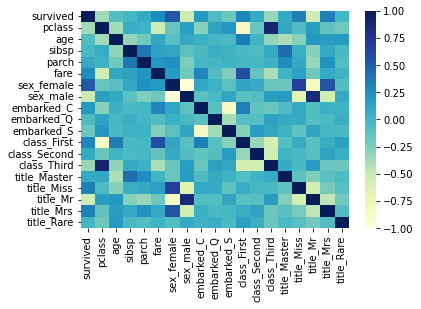

In [37]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

In [42]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df[corr_df['feature_1'] == 'survived'].head(10)

,feature_1,feature_2,correlation
6,survived,sex_female,0.538826
15,survived,title_Miss,0.333216
17,survived,title_Mrs,0.330869
11,survived,class_First,0.301831
5,survived,fare,0.268189
8,survived,embarked_C,0.193607
4,survived,parch,0.093317
12,survived,class_Second,0.084753
14,survived,title_Master,0.083128
18,survived,title_Rare,-0.015439


## train/test split

In [36]:
X = data.drop(columns='survived')
y = data['survived']

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## data normalizing

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [86]:
X_train_scaled

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,title_Master,title_Miss,title_Mr,title_Mrs,title_Rare
0,1.0,0.372699,0.0,0.000000,0.018543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.5,0.413610,0.0,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.372699,0.0,0.000000,0.015412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.5,0.386336,0.2,0.000000,0.040989,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.822719,0.0,0.000000,0.063086,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.5,0.372699,0.0,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
495,0.5,0.249966,0.0,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
496,0.0,0.618164,0.0,0.000000,0.154588,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
497,1.0,0.345425,0.2,0.000000,0.015330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## baseline model

In [87]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
base_model = SVC(kernel='linear')
cross_val_score(base_model, X_train_scaled, y_train, cv=5).mean()

CPU times: user 44.4 ms, sys: 5.62 ms, total: 50 ms
Wall time: 48.4 ms


0.8177171717171717

## model tuning 

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [99]:
model = SVC()

search_space = {
    'kernel':['rbf'],
    'C':stats.uniform(0.01,100),
    'gamma':stats.loguniform(0.001,100)
}

search = RandomizedSearchCV(model,search_space,n_jobs=-1,n_iter=500,cv=5,scoring='accuracy',verbose=1)

In [100]:
search.fit(np.array(X_train_scaled),np.array(y_train))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2324 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    3.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x151286a60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1514fb160>,
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [90]:
search.best_params_

{'C': 80.79651998961688, 'gamma': 0.006415683443435096, 'kernel': 'rbf'}

In [91]:
search.best_score_

0.8237171717171717

In [92]:
new_model = search.best_estimator_
new_model.fit(X_train_scaled,y_train)

SVC(C=80.79651998961688, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.006415683443435096, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [93]:
print(cross_val_score(new_model,X_train_scaled,y_train,cv=5).mean())

0.8237171717171717


## model performance

In [94]:
best_model = SVC(C=80.79651998961688,gamma=0.006415683443435096)

In [95]:
best_model.fit(scaler.transform(X_train),y_train)

SVC(C=80.79651998961688, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.006415683443435096, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [96]:
from sklearn.metrics import classification_report

# Use model to predict
y_pred = best_model.predict(scaler.transform(X_test))

# Compare predictions and true values to produce classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       125
           1       0.82      0.72      0.77        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.81       215
weighted avg       0.82      0.82      0.82       215



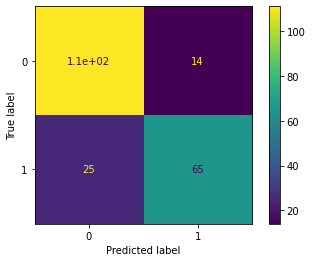

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model, scaler.transform(X_test), y_test)